In [1]:
from pathlib import Path
import numpy as np
from scipy.spatial.distance import squareform
import pandas as pd
import seaborn as sns
from psifr import fr
fig_dir = Path("plots")

In [2]:
raw = fr.sample_data("Morton2013")
raw["category"] = raw["category"].astype("category").cat.as_ordered()
data = fr.merge_free_recall(
    raw, list_keys=["list_type", "list_category"], study_keys=["category"]
)

In [3]:
s1 = fr.filter_data(data, subjects=1)

LINO NOT subset; don't know how to subset; dropped


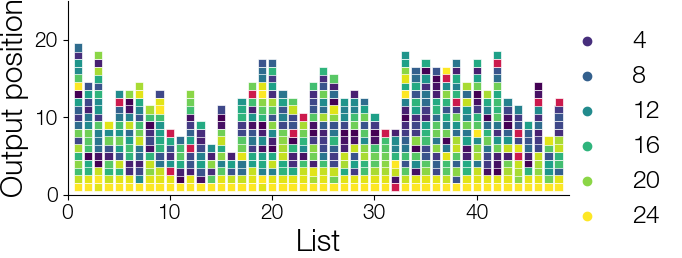

In [4]:
g = fr.plot_raster(s1, length=6.2).add_legend()
g.savefig(fig_dir / "raster_subject.pdf")

LINO NOT subset; don't know how to subset; dropped
LINO NOT subset; don't know how to subset; dropped


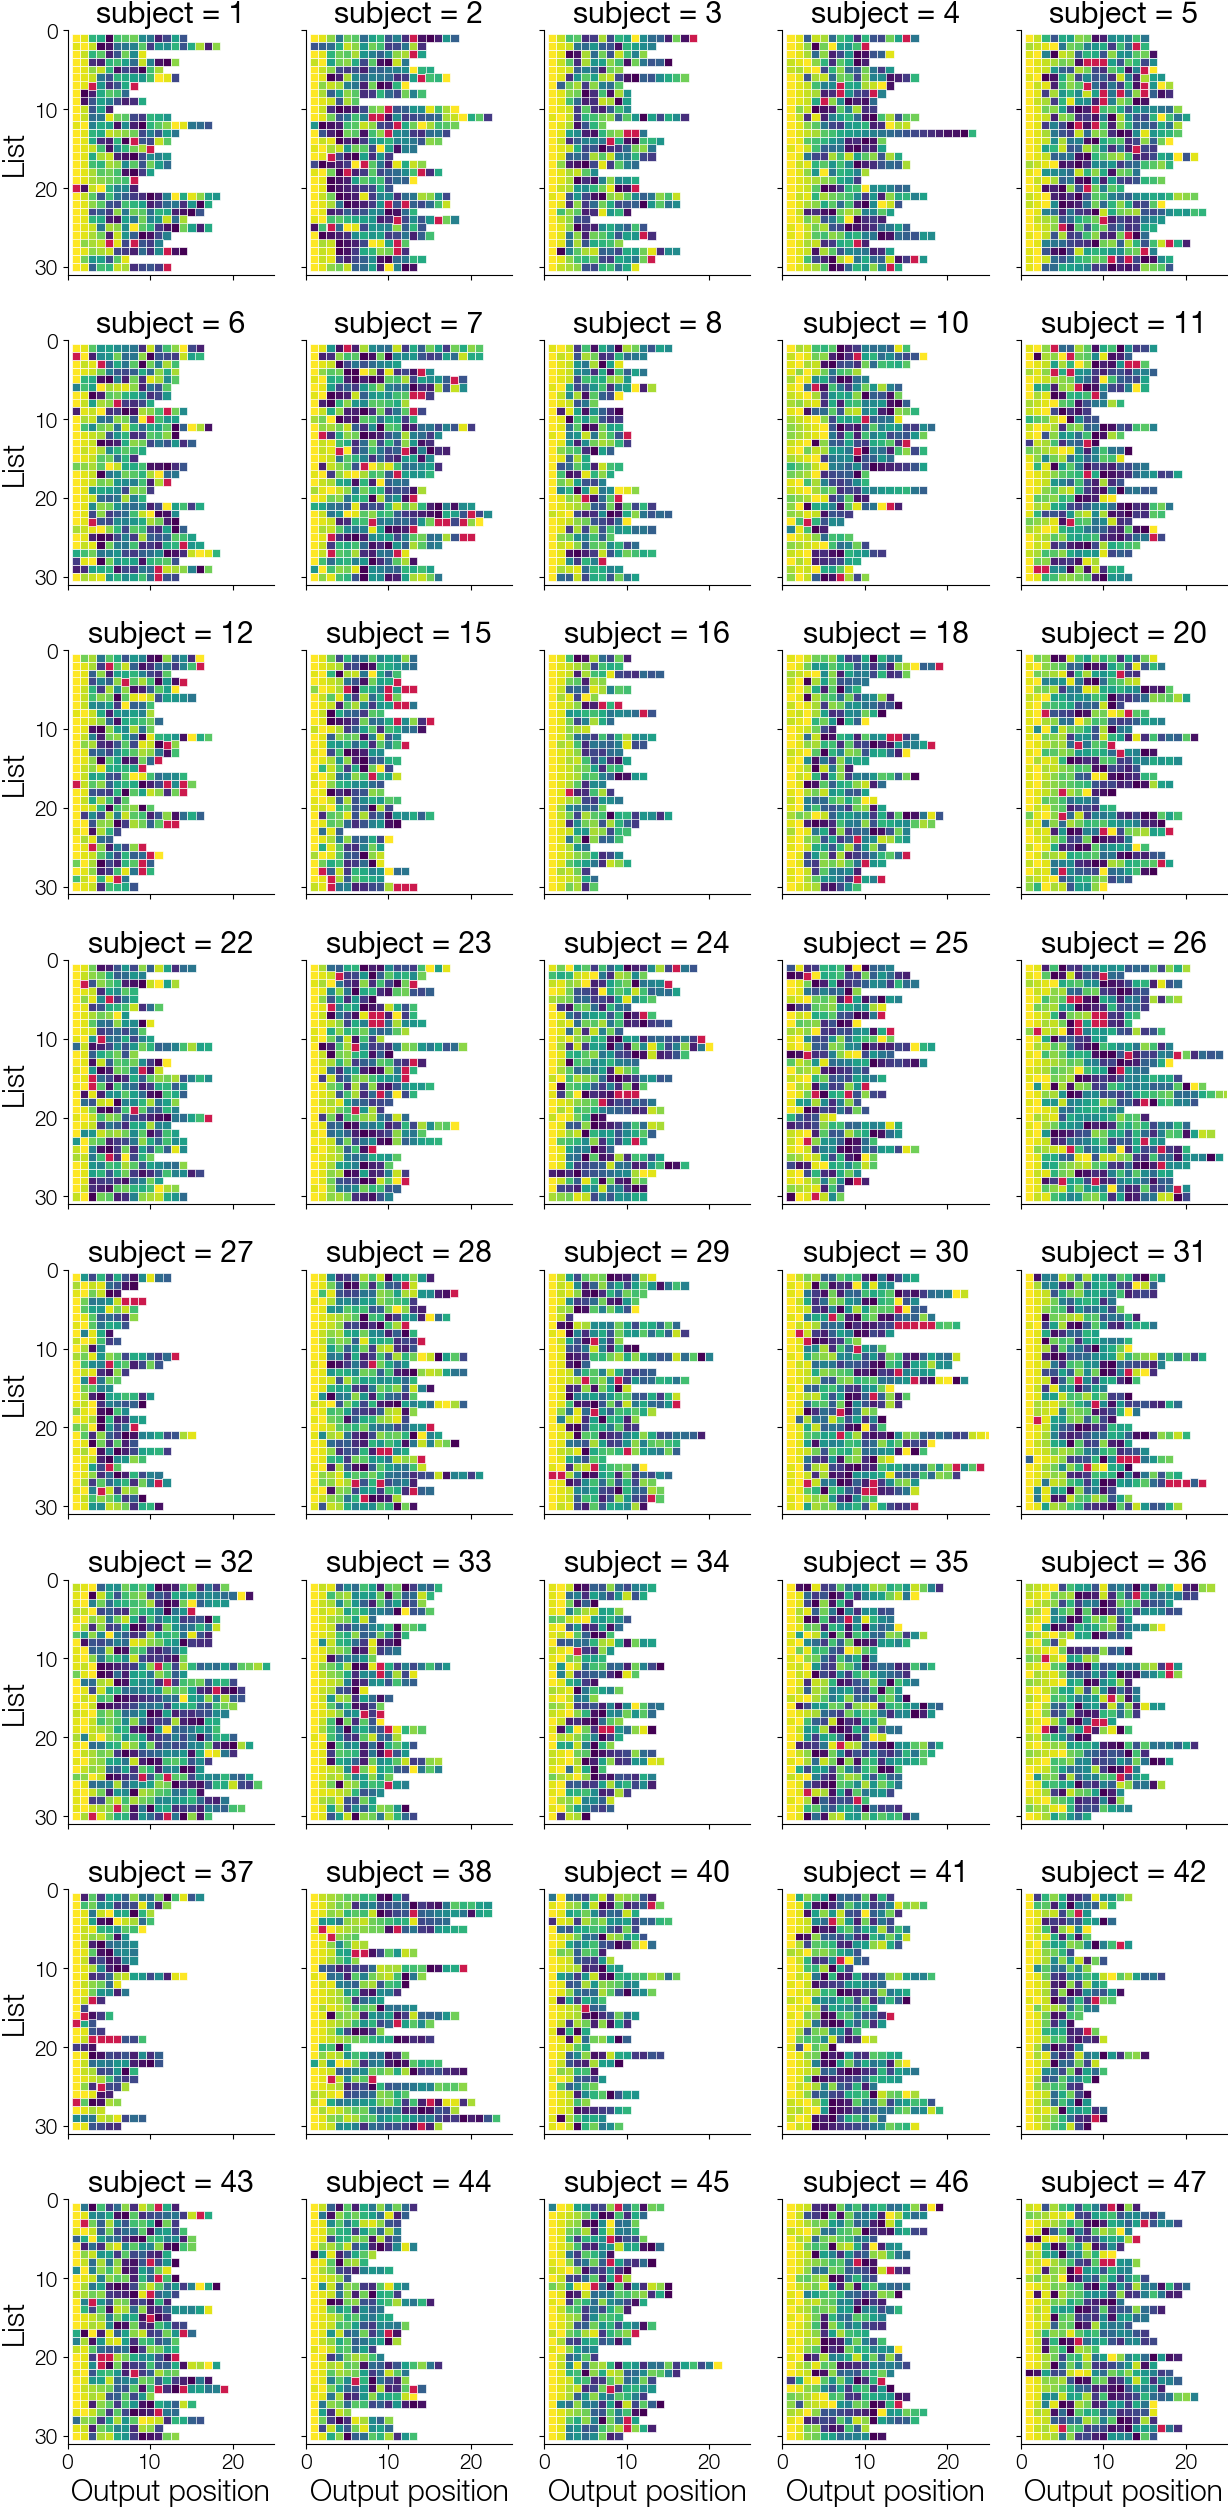

In [5]:
mixed = data.query("list_type == 'mixed'").copy()
mixed = fr.reset_list(mixed)
g = fr.plot_raster(
    mixed, col="subject", col_wrap=5, length=3.2, orientation="vertical"
)
g.savefig(fig_dir / "raster_mixed.pdf")

LINO NOT subset; don't know how to subset; dropped


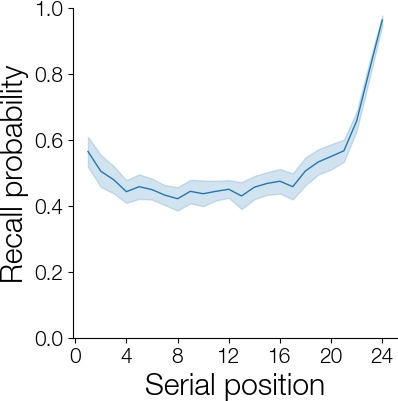

In [6]:
g = fr.plot_spc(fr.spc(data), height=4.5)
g.set(xticks=np.arange(0, 25, 4))
g.savefig(fig_dir / 'spc.pdf')

LINO NOT subset; don't know how to subset; dropped


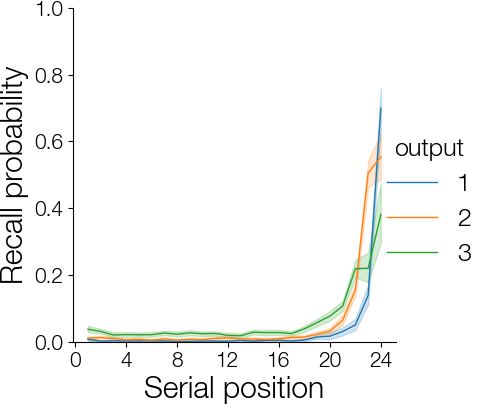

In [7]:
g = fr.plot_spc(
    fr.pnr(data).query("output <= 3"), hue="output", height=4.5
).add_legend()
g.set(xticks=np.arange(0, 25, 4))
g.savefig(fig_dir / 'pnr.pdf')

LINO NOT subset; don't know how to subset; dropped


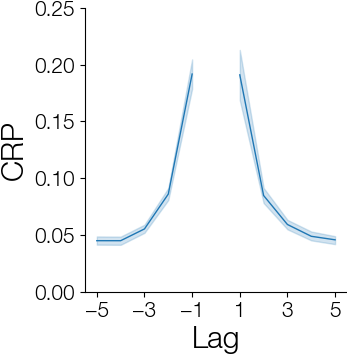

In [8]:
g = fr.plot_lag_crp(fr.lag_crp(data), height=4)
g.set(ylim=(0, .25), xticks=np.arange(-5, 6, 2))
g.savefig(fig_dir / 'lag_crp.pdf')

LINO NOT subset; don't know how to subset; dropped


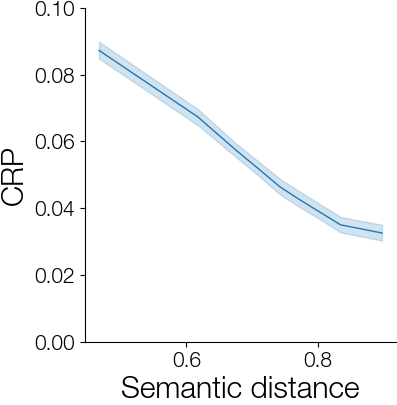

In [9]:
items, distances = fr.sample_distances('Morton2013')
data['item_index'] = fr.pool_index(data['item'], items)
edges = np.percentile(squareform(distances), np.linspace(1, 99, 10))
g = fr.plot_distance_crp(
    fr.distance_crp(data, 'item_index', distances, edges), height=4.5
)
g.set(xlabel="Semantic distance", ylim=(0, 0.1))
g.savefig(fig_dir / "distance_crp.pdf")

LINO NOT subset; don't know how to subset; dropped


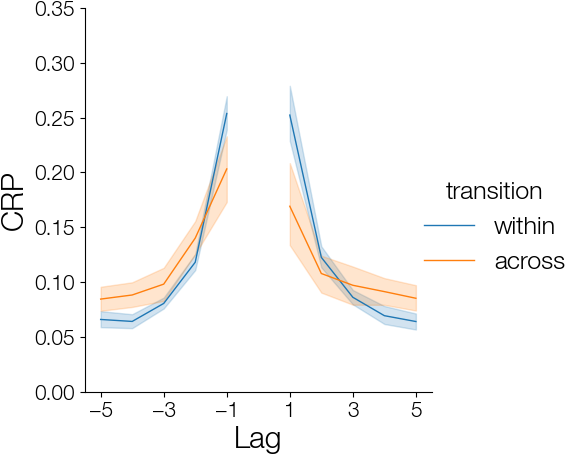

In [10]:
crp_within = fr.lag_crp(data, test_key='category', test=lambda x, y: x == y)
crp_across = fr.lag_crp(data, test_key='category', test=lambda x, y: x != y)
crp_combined = pd.concat([crp_within, crp_across], keys=['within', 'across'], axis=0)
crp_combined.index.set_names('transition', level=0, inplace=True)
g = fr.plot_lag_crp(crp_combined, hue='transition', height=5).add_legend()
g.set(ylim=(0, .35), xticks=np.arange(-5, 6, 2))
g.savefig(fig_dir / "lag_crp_cat.pdf")

In [11]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.5.0

numpy  : 1.23.4
seaborn: 0.12.0
pandas : 1.5.0
psifr  : 0.8.2

